In [27]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda



import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

In [28]:
features, target, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

In [19]:
def gd(X, y, theta, learning_rate):
    """The standard gradient descent algo."""
    m = X.shape[0]
    error = np.dot(X, theta) - y
    grad = np.dot(X.transpose(), error)
    update = theta - learning_rate * (1/m) * grad
    MSE = np.average(error ** 2)
    return update, MSE

In [29]:
lr = 0.01
theta = np.array([0,0])
epochs = 1000


def perform_learning(X, y, theta, lr, epochs):
    thetas = theta
    results = np.array([0,0])
    for i in range(epochs):
        theta, MSE = gda.gd(X, y, theta, lr)
        thetas = np.vstack([thetas, theta])
        results = np.vstack([results, np.array([i+1, MSE])])
        
    return thetas, results

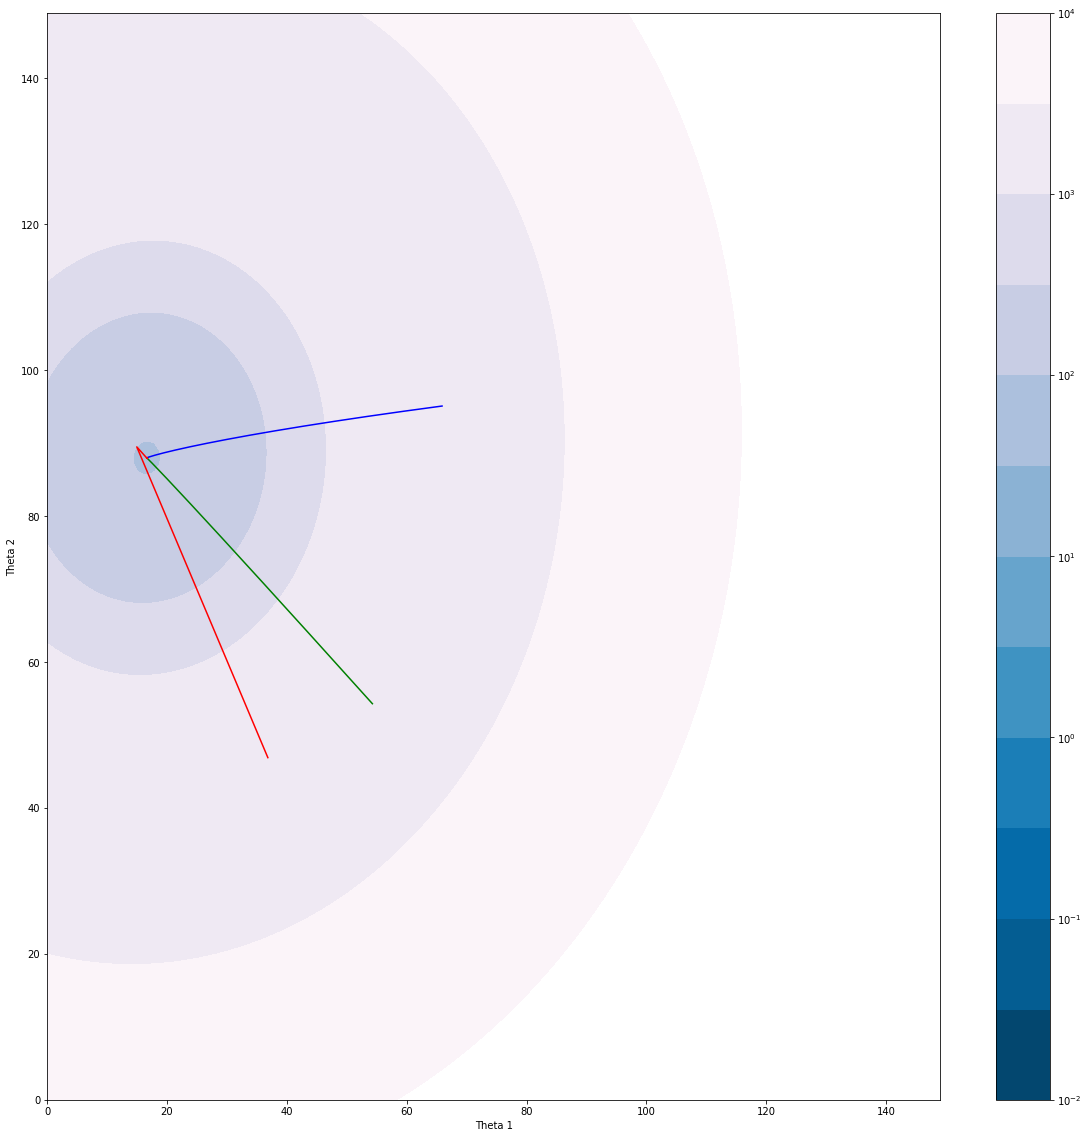

Final thetas: [16.61830202 87.98176447]
Actual Coefficents: [16.88001901 87.91985605]


In [30]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 20))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 10000

learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.random.random(2,)*100 for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = perform_learning(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c)
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [18]:
## TODO: 3D plot of GD

NameError: name 'i' is not defined

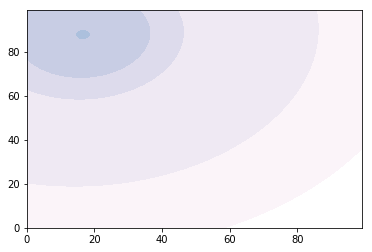

In [17]:
from mpl_toolkits.mplot3d import axes3d
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots()
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

theta = np.array([0,1])
epochs = 10

learing = [0.01, 0.1, 10]
colors = ['b', 'g', 'r']


for lr, c in i:
    theta = np.array([0,1])
    thetas, MSE = perform_learning(lr, theta, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c)
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()